# Chapter 5: A Distribution Network with Compound Capacities

In the preceeding chapters we assumes an unlimited capacity which is not the case in reality. This chapter shows how to enhance your model with capacities. Here we assume that warehouse in New Orleans has a limit capacity of handling just 8 pallets, but one at NewYork 14 pallets. What will change in the model?

There are two ways of bringing capacities into a model: either by a defining a capacity by Capacity() or by assigning a capacity be capacity(). The first one (uppercase) is a creation of an object of class Capacity, where the second one (lowercase ) is excecutung a method of class Net(). 

In our model we use both: the first one in section Capacities(), the second one section "Conversion Costs". All other parts are identical to chapter 3 and the updated chart is shown in section "Excecute the Net" below.

We assume two scenarios of which differ only by their compound capacities in section Capacities.

# Locations

In [1]:
globals().clear(); import aitpath; 
from sunflow import SupplyNet,Logistics,Customer,Location,Freight,Producer, Capacity

Europe      = Location('EUR')            # the Winery
New_York    = Location('New York')       # warehouse
New_Orleans = Location('New Orleans')    # warehouse
StLouis     = Location('StLouis')        # customer
Baltimore   = Location('Baltimore')      # !!!

# Freight Costs

In [2]:
Freight(Europe,       New_York,      2500/20 )
Freight(Europe,       New_Orleans,   2900/20 )
Freight(New_York,     StLouis,       1200/20 )
Freight(New_Orleans,  StLouis,        820/20 )

Freight(Europe,       Baltimore,     2500/20 )  # !!!
Freight(Baltimore,    StLouis,       1500/20 )  # !!!

print()

# Capacities

In [3]:
#NY_NOR_WH_capa = Capacity('NY + NOR', 50 )  # scenario 1
NY_NOR_WH_capa = Capacity('NY + NOR', 12 )  # scenario 2

# Producers, Customers, Logistics

The warehouses at NewYork and NewOrleans got now a joint total capacity of 8 pallets and the warehouse at NewOrleans a single capacity of 5 pallets. 

The conversion costs of Baltimore warehouse can be applied at declaration time (here) or later at building time (see NewYork and NewOrleans warehouses in section Conversions).

In [4]:
Winery          = Producer('Winery')          .at(Europe)
New_York_WH     = Logistics('New York WH')    .at(New_York)    .compoundCapacity(NY_NOR_WH_capa).capacity(30) # !!!
New_Orleans_WH  = Logistics('New_Orleans WH') .at(New_Orleans) .compoundCapacity(NY_NOR_WH_capa).capacity(9)  # !!!
Baltimore_WH    = Logistics('Baltimore WH')   .at(Baltimore)   .varcost(4)  # !!!
Walmart         = Customer('Walmart')         .at(StLouis)

# Create a new Net¶

In [5]:
net = SupplyNet('Chapter 5 Distribution USA').display(0)

# Build the Net

In [6]:
winery = net.source().n(' ').by(Winery)  

# Conversions

In [7]:
new_york    = net.distribution(winery).n(' ')  .by(New_York_WH)     .varcost(4) 
new_orleans = net.distribution(winery).n(' ')  .by(New_Orleans_WH)  .varcost(2) 
baltimore   = net.distribution(winery).n(' ')  .by(Baltimore_WH)    .varcost(4)

In [8]:
walmart = net.delivery(new_york, new_orleans, baltimore).n(' ') .at(Walmart) .demand(20)   # !!!

# Compile and Graph the Net

In [9]:
net.compile()

# Execute the Net

In [10]:
net.execute().showGraph(orient='BT').view()

# Two Capacity Scenarios


We assumed the two scenarios:

    - scenario 1: capacity NewYork    = 30 pallets
                  capacity NewOrleans = 9 pallets

    - scenario 2: capacity NewYork    = 30 pallets
                  capacity NewOrleans = 9 pallets
                  compound capacity NewYork+NewOrleans = 12 pallets
                  
In both scenarios we assume no capacity constraint from warehouse Baltimore. With the given freight and conversion costs the three path ways would cost:

    Winery ==> Baltimore  ==> Walmart  = 125+4+75 = 205,-  ==> No.3
           ==> NewOrleans ==> Walmart  = 145+2+41 = 188,-  ==> No.1 cheapest
           ==> NewYork    ==> Wallmart = 125+4+60 = 189,-  ==> No.2


### Scenario 1

For scenario 1 we would costwise expect that the maximum quantity would go through NewOrleans. Due to the capacity limitation of 9 pallets the remaining quantity would flow along the second best alternative NewYork with 11 pallets. This fits with the result below.


<div>
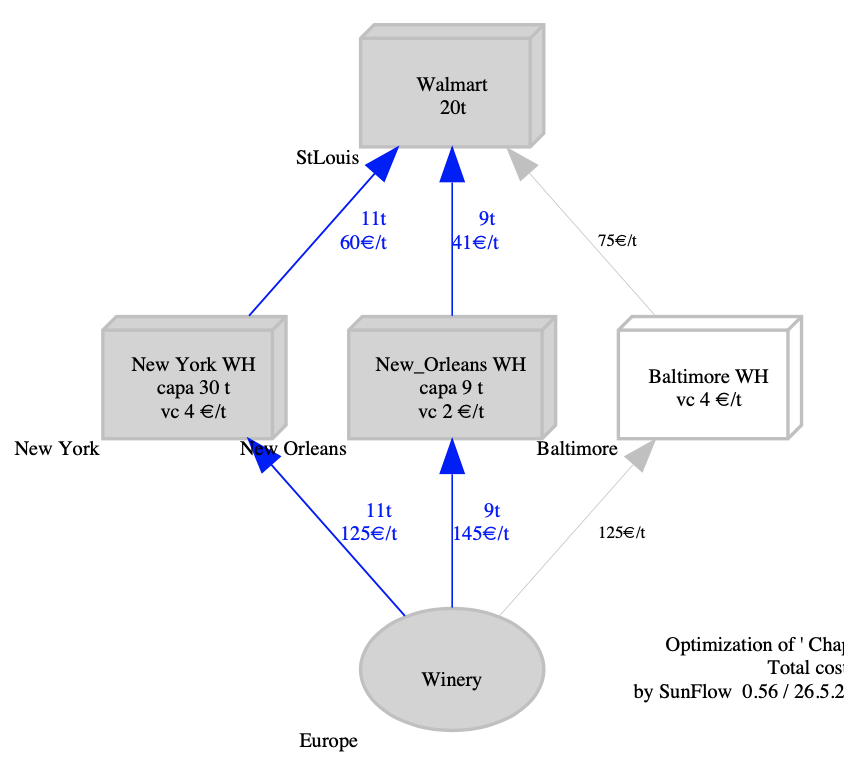
</div>

### Scenario 2

The only difference between both scenarios is the introduction of a compound capacity which says that even if both or one of them has a higher single capacity the total capacity of both is limited to 12 pallets. Since the cost assumptions didn't change we would expect the following flows:

- cheapest path through NewOrleans: 9 pallets max. capacity
- runner-up is NewYork: NewYork got a single capacity of 30 but a joint one of 12 pallets of which 9 are already eaten-up from NewOrleans, the maximum flow is therefore limited to 3 pallets
- the remaining quantity of 8 pallets must flow through the most expensive hub Baltimore.

This is exacly what SunFlow figured out in the chart below.


<div>
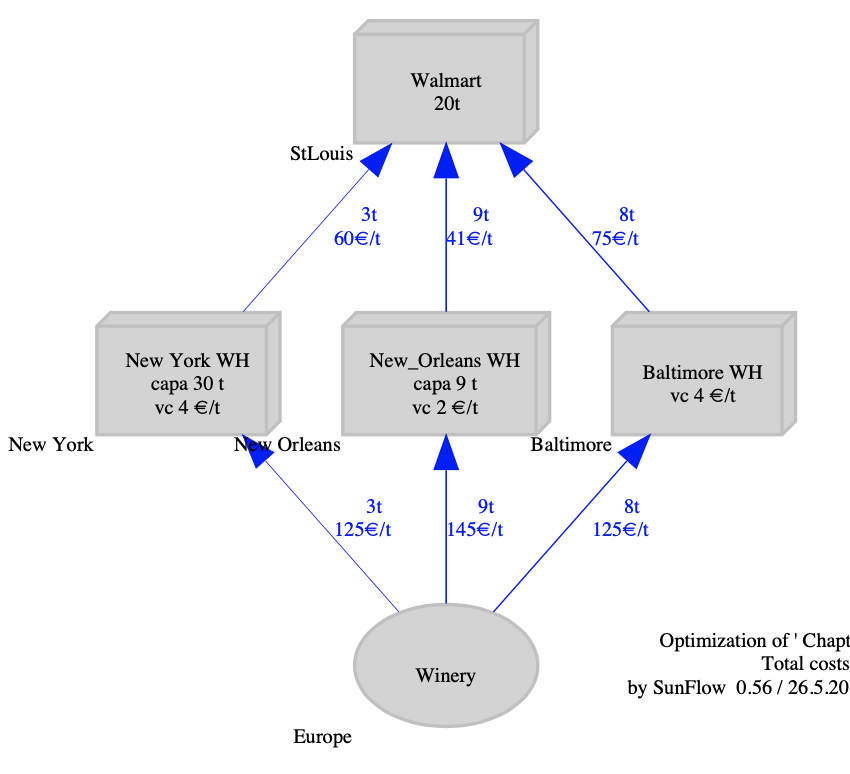
</div>